In [16]:
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
dfs = []
def load_and_label(filename, label):
    df = pd.read_csv(filename)
    df['label'] = label
    df = df.drop(df.loc[df['Name'] != 'Aggregated'].index, axis=0)
    return df

filenames_labels = [
    ('data/300_python_com_requests.csv', '300_python_com'),
    ('data/500_python_com_requests.csv', '500_python_com'),
    ('data/300_python_sem_requests.csv', '300_python_sem'),
    ('data/500_python_sem_requests.csv', '500_python_sem'),
    ('data/300_ruby_com_requests.csv', '300_ruby_com'),
    ('data/500_ruby_com_requests.csv', '500_ruby_com'),
    ('data/300_ruby_sem_requests.csv', '300_ruby_sem'),
    ('data/500_ruby_sem_requests.csv', '500_ruby_sem'),
]
for filename, label in filenames_labels:
    df = load_and_label(filename, label)
    dfs.append(df)
data = pd.concat(dfs, ignore_index=True)
data

,Type,Name,Request Count,Failure Count,Median Response Time,Average Response Time,Min Response Time,Max Response Time,Average Content Size,Requests/s,...,75%,80%,90%,95%,98%,99%,99.9%,99.99%,100%,label
0,NaN,Aggregated,19385,0,45.0,84.916411,1.831419,2165.171881,10282.297498,622.214952,...,81,100,190,300,630,790,1300,2100,2200,300_python_com
1,NaN,Aggregated,30719,0,49.0,259.834057,1.860158,16690.670085,10209.781471,599.148737,...,250,270,420,1300,2200,2700,5800,16000,17000,500_python_com
2,NaN,Aggregated,1001,19,4100.0,3878.671439,156.745827,9642.678170,3275.794206,32.310324,...,5300,5700,6400,6800,7500,7800,9500,9600,9600,300_python_sem
3,NaN,Aggregated,1503,18,5500.0,5933.171944,161.993961,28969.169617,4621.870259,29.446216,...,7900,8400,10000,13000,16000,18000,25000,29000,29000,500_python_sem
4,NaN,Aggregated,1451,77,1100.0,1607.935184,173.203055,4450.154015,23687.858718,46.741941,...,2400,2800,3400,3600,3900,4100,4300,4500,4500,300_ruby_com
5,NaN,Aggregated,2448,124,1200.0,1692.273601,255.834761,23414.269395,23866.343546,47.946279,...,2600,2900,3400,3600,4000,4300,5700,23000,23000,500_ruby_com
6,NaN,Aggregated,3293,619,350.0,550.388190,1.790355,4219.061842,37758.553599,110.688999,...,840,990,1500,1900,2300,2700,3700,4200,4200,300_ruby_sem
7,NaN,Aggregated,2472,108,1100.0,1671.537892,162.996512,7009.419938,23003.389159,48.420709,...,2500,2800,3500,3800,4100,4200,4600,7000,7000,500_ruby_sem


In [18]:
by_label = data.groupby(['label'])

In [19]:
rps = by_label['Requests/s'].mean()
rps

label
300_python_com    622.214952
300_python_sem     32.310324
300_ruby_com       46.741941
300_ruby_sem      110.688999
500_python_com    599.148737
500_python_sem     29.446216
500_ruby_com       47.946279
500_ruby_sem       48.420709
Name: Requests/s, dtype: float64

<Axes: title={'center': 'Requests/s'}, xlabel='label'>

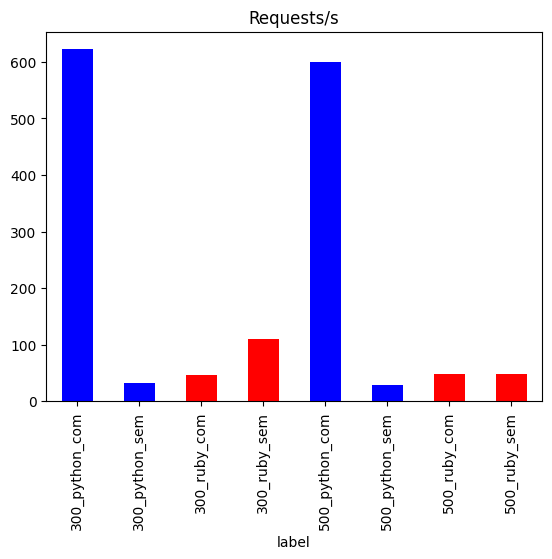

In [20]:
by_label['Requests/s'].mean().plot(kind='bar', title='Requests/s', color=['blue', 'blue', 'red', 'red'])

<Axes: title={'center': 'Tempo de resposta médio (ms)'}, xlabel='label'>

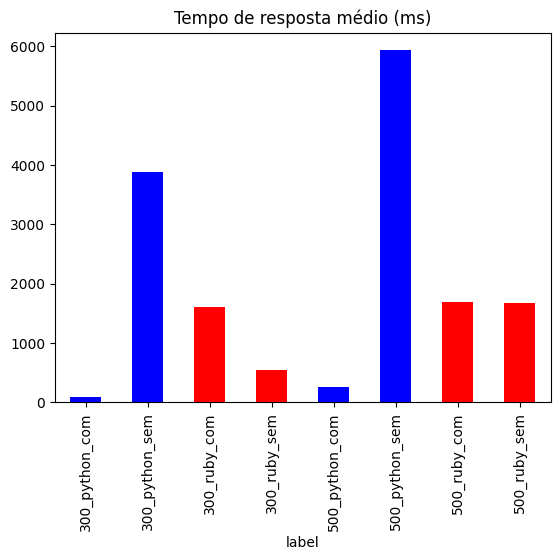

In [21]:
by_label['Average Response Time'].mean().plot(kind='bar', title='Tempo de resposta médio (ms)', color=['blue', 'blue', 'red', 'red'])

<Axes: title={'center': 'Total de requisições'}, xlabel='label'>

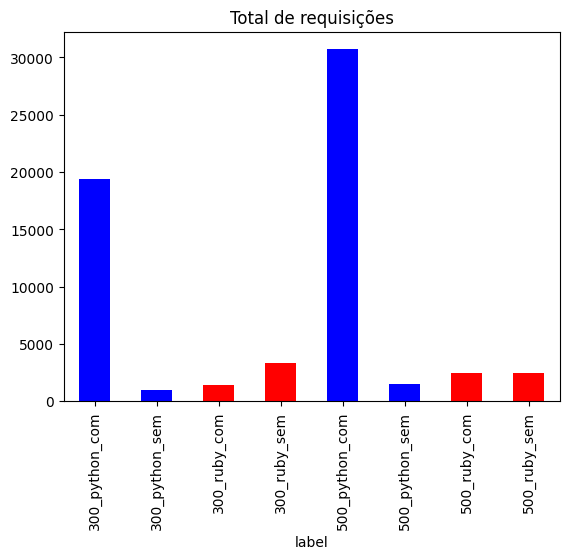

In [22]:
by_label['Request Count'].mean().plot(kind='bar', title='Total de requisições', color=['blue', 'blue', 'red', 'red'])

<Axes: title={'center': 'Quantidade de falhas'}, xlabel='label'>

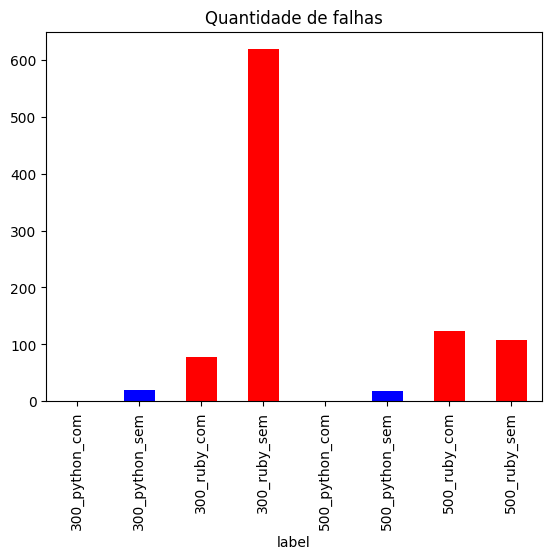

In [23]:
by_label['Failure Count'].mean().plot(kind='bar', title='Quantidade de falhas', color=['blue', 'blue', 'red', 'red'])

<Axes: title={'center': 'Percentil 95% (ms)'}, xlabel='label'>

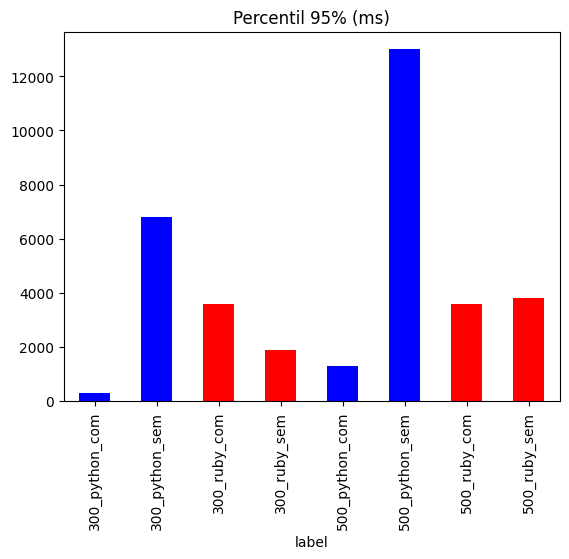

In [24]:
by_label['95%'].mean().plot(kind='bar', title='Percentil 95% (ms)', color=['blue', 'blue', 'red', 'red'])